## Customer_churn_analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.
Here,i have downloaded the data from the github link(https://github.com/dsrscientist/DSData /Telecom customer churn .csv).

Importing numpy and pandas for data operations,matplotlib and seaborn for the visualizations of the data and sklearn models for data modeling

In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#importing warnings to suppress while execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset from the folder files
c=pd.read_csv('C:/Users/hp/Downloads/DSData-master/Telecom_customer_churn.csv')

#putting the data to the dataframe for operations
churn=pd.DataFrame(c)

#lets check for the data structure
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


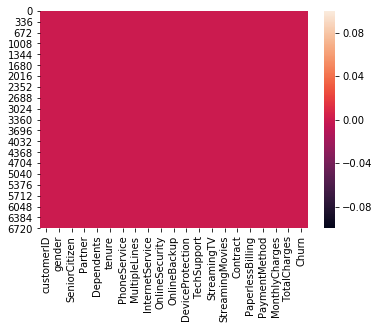

In [3]:
#checking for the null values using heatmap
sns.heatmap(churn.isnull())

#it shows there is no null data in the dataset

In [4]:
#lets check for the value_counts in columns
for col in churn.columns:
    print(churn[col].value_counts())

8232-UTFOZ    1
7926-IJOOU    1
7354-OIJLX    1
0177-PXBAT    1
8311-UEUAB    1
             ..
2923-ARZLG    1
4727-MCYZG    1
2430-USGXP    1
8714-EUHJO    1
7963-SHNDT    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [5]:
#lets drop the customer ID,as it don't have necessary info to calculate the churn
churn.drop('customerID',axis=1,inplace=True)

In [6]:
#getting the complete details of each features
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [7]:
#total charge seems to be not ok,lets see it seperately
churn['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
279.25      1
3088.25     1
267.4       1
7113.75     1
234.85      1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
#it shows totalCharges as a object datatype but it needs to be in float datatype,so lets convert it first
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors='coerce')

In [9]:
#we used coerce,so invalid parsing will be set as NaN.so lets check it
churn['TotalCharges'].isnull().sum()

11

In [10]:
#lets impute the null values in total charges
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median')
churn['TotalCharges']=imp.fit_transform(churn['TotalCharges'].values.reshape(-1,1))

Data Visualisation

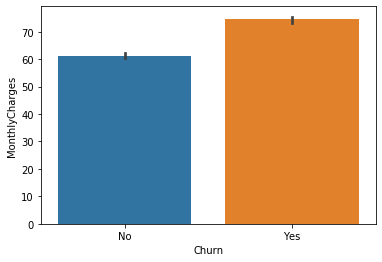

In [11]:
#lets chcek the average montly charges
sns.barplot(x="Churn",y="MonthlyCharges",data=churn)

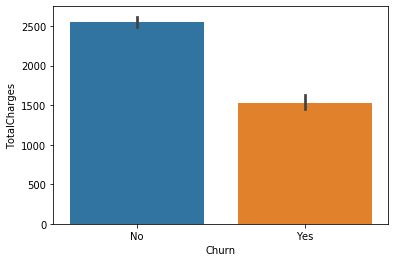

In [12]:
#lets chcek the total charges
sns.barplot(x="Churn",y="TotalCharges",data=churn)

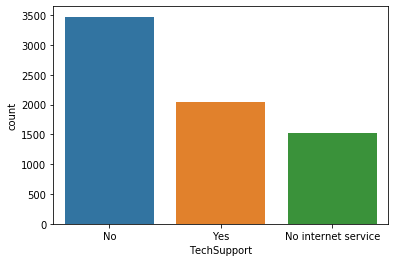

In [13]:
#lets chcek the count of customers churn on the basis of tech support
sns.countplot(x="TechSupport",data=churn)

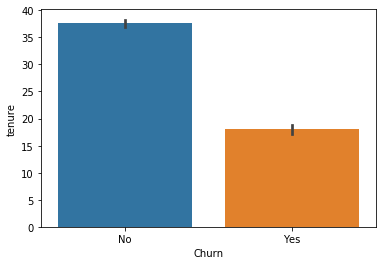

In [14]:
#plotting barplot to get churn data on basis of tenure
sns.barplot(x='Churn',y='tenure',data=churn)

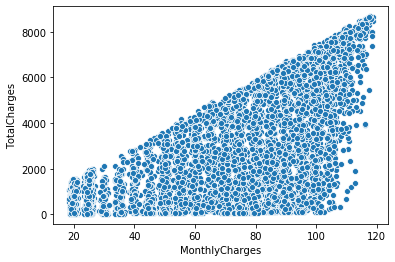

In [15]:
#plot for monthlycharges and total charges
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=churn)

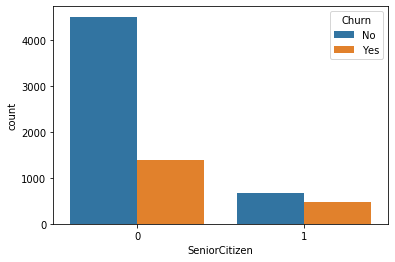

In [16]:
#Now lets check the count of SeniorCitizen
sns.countplot(x="SeniorCitizen",hue="Churn",data=churn)

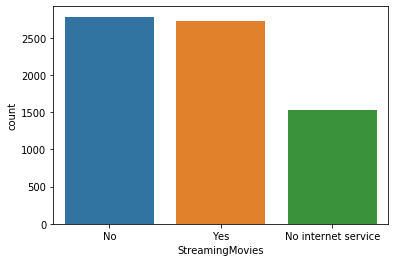

In [17]:
sns.countplot(x="StreamingMovies",data=churn)

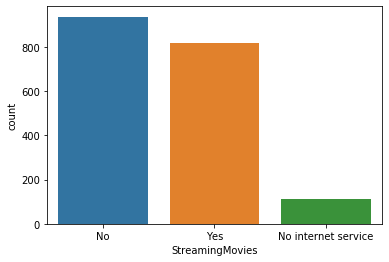

In [18]:
#lets chcek the count of streaming movie ratio when churn is yes
sns.countplot(x="StreamingMovies",data=churn.loc[churn["Churn"]=="Yes"])

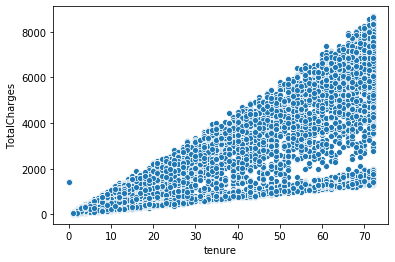

In [19]:
#plotting for the tenure on basis of total charges
sns.scatterplot(x='tenure',y='TotalCharges',data=churn)

In [20]:
#correlation among the data
churn.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


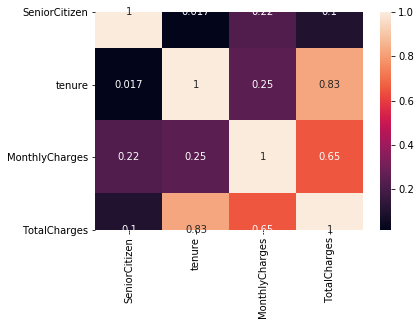

In [21]:
#correlation view using heatmap
sns.heatmap(churn.corr(),annot=True)

In [22]:
#lets convert the object datatype to labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in churn.columns:
    if churn[i].dtypes==object:
        churn[i]=le.fit_transform(churn[i].astype(str))

Statistical summary of data

In [23]:
#lets describe the data for statistics summary
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


From the above summary,we got some of the column needs to be rectified,as there is so much diffrence in mean and median values and min-max values

In [24]:
#importing boxcox to adjust totalCharges as it has not fit data 
from scipy.stats import boxcox
churn['TotalCharges']=boxcox(churn['TotalCharges'],0)

In [25]:
#importing zscore to adjust any outliers
from scipy.stats import zscore
z=np.abs(zscore(churn))
churn_new=churn[(z<3).all(axis=1)]
churn_new.shape

(6361, 20)

In [26]:
#taking the modified dataset as a final one
churn=churn_new

shaping the data for machine learning process

In [27]:
#seperating the input and target variables
mod_x=churn.iloc[:,:-1]
y=churn.iloc[:,-1]

In [28]:
#checking for skewed values
mod_x.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.756372
dtype: float64

In [29]:
#adjusting for skewed data
for col in mod_x.columns:
    if mod_x[col].skew()>0.55:
        mod_x[col]=np.log1p(mod_x[col])
    if mod_x[col].skew()<-0.55:
        mod_x[col]=np.sqrt(mod_x[col])

In [30]:
#applying standard scaler to the input data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(mod_x)
x=pd.DataFrame(x,columns=mod_x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.992638,-0.441591,-0.972245,-0.653600,0.063470,0.0,-0.936163,-1.350531,1.436848,-1.052857,1.262811,-0.935165,-1.148627,-1.152974,0.599593,-1.211765,1.335443,-0.336617,0.394958
1,0.992638,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,-1.350531,1.436848,1.252556,-1.044785,-0.935165,-1.148627,-1.152974,-0.866394,0.825243,1.335443,-0.438432,-1.460681
2,-1.007416,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,0.046790,-0.929747,-1.052857,-1.044785,-0.935165,-1.148627,-1.152974,-0.866394,0.825243,0.399691,0.114985,-1.216206
3,-1.007416,-0.441591,-0.972245,-0.653600,-0.993734,0.0,1.068190,0.046790,-0.929747,-1.052857,1.262811,-0.935165,1.145381,1.141072,-0.866394,0.825243,0.399691,1.065811,-0.102945
4,0.992638,-0.441591,-0.972245,1.529987,-0.424470,0.0,1.068190,0.046790,-0.929747,1.252556,-1.044785,-0.935165,1.145381,-1.152974,-0.866394,0.825243,-0.536060,0.719309,0.413038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,-1.007416,-0.441591,-0.972245,-0.653600,1.608613,0.0,-0.936163,1.444110,0.253551,0.099849,0.109013,0.246047,-0.001623,-0.005951,1.457141,0.825243,-1.471812,-1.512422,0.227454
6357,0.992638,-0.441591,1.028548,1.529987,-0.343147,0.0,1.068190,-1.350531,1.436848,-1.052857,1.262811,1.427259,1.145381,1.141072,0.599593,0.825243,1.335443,0.578081,0.425104
6358,-1.007416,-0.441591,1.028548,1.529987,1.608613,0.0,1.068190,0.046790,-0.929747,1.252556,1.262811,-0.935165,1.145381,1.141072,0.599593,0.825243,-0.536060,1.182406,1.151054
6359,0.992638,2.264538,1.028548,-0.653600,-1.156381,0.0,1.068190,0.046790,-0.929747,-1.052857,-1.044785,-0.935165,-1.148627,-1.152974,-0.866394,0.825243,1.335443,0.236506,-0.732233


In [31]:
#creating function to get best random_state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [32]:
#creating function for model operations and metrics evaluation
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    score=ml.score(x_train,y_train)
    pred=ml.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [33]:
#roc_curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

In [34]:
#cross_val_score
def cross_val(alg):
    cvscore=cross_val_score(alg,x,y,cv=5)
    print(cvscore)
    print(cvscore.mean())
    print(cvscore.std())

lets apply algorithm one by one

logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.8185714285714286 at 84


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=84)
model(lr)

0.8185714285714286
[[1442  143]
 [ 238  277]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1585
           1       0.66      0.54      0.59       515

    accuracy                           0.82      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.81      0.82      0.81      2100



In [37]:
cross_val(lr)

[0.81068342 0.80282797 0.79795597 0.81053459 0.80881196]
0.8061627831082816
0.005000794998094345


Decision tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.7661904761904762 at 75


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=75)
model(dtc)

0.7528571428571429
[[1300  259]
 [ 260  281]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1559
           1       0.52      0.52      0.52       541

    accuracy                           0.75      2100
   macro avg       0.68      0.68      0.68      2100
weighted avg       0.75      0.75      0.75      2100



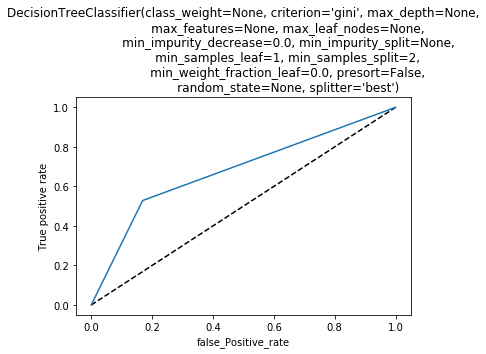

roc_auc_score= 0.6766381833940189


In [40]:
roc(dtc)

In [41]:
cross_val(dtc)

[0.73684211 0.72427337 0.73584906 0.73742138 0.74193548]
0.7352642798755685
0.005878599429685938


Naive_bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.7838095238095238 at 52


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=52)
model(dtc)

0.7233333333333334
[[1237  259]
 [ 322  282]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1496
           1       0.52      0.47      0.49       604

    accuracy                           0.72      2100
   macro avg       0.66      0.65      0.65      2100
weighted avg       0.72      0.72      0.72      2100



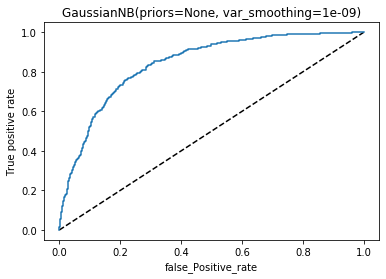

roc_auc_score= 0.7656421539115345


In [44]:
roc(gnb)

In [45]:
cross_val(gnb)

[0.76119403 0.76983504 0.75314465 0.76179245 0.76081825]
0.7613568850924753
0.0052882158635296


K-Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#determining best neighbors
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 34}

In [48]:
knn=KNeighborsClassifier(n_neighbors=34)
random(knn)

0.8023809523809524 at 70


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=70)
model(knn)

0.8023809523809524
[[1367  181]
 [ 234  318]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1548
           1       0.64      0.58      0.61       552

    accuracy                           0.80      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.80      0.80      0.80      2100



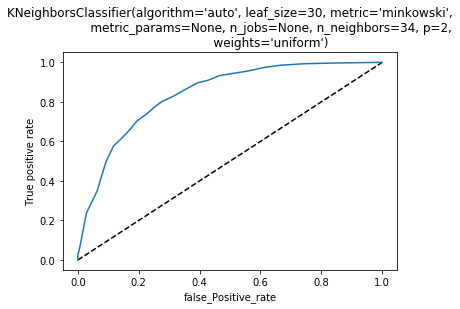

roc_auc_score= 0.729580945961128


In [50]:
roc(knn)

In [51]:
cross_val(knn)

[0.78868814 0.78161822 0.78301887 0.79402516 0.79464988]
0.788400054012431
0.00539880544977917


Support Vector Machine

In [52]:
from sklearn.svm import SVC
svm=SVC()

#detrmining best kernel
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [53]:
svm=SVC(kernel='linear',probability=True)
random(svm)

0.8214285714285714 at 84


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=84)
model(svm)

0.8214285714285714
[[1450  135]
 [ 240  275]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1585
           1       0.67      0.53      0.59       515

    accuracy                           0.82      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.81      0.82      0.81      2100



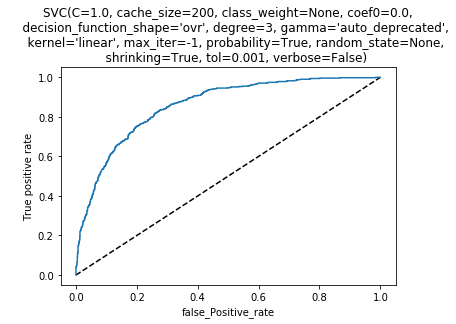

roc_auc_score= 0.7244035404734923


In [55]:
roc(svm)

In [56]:
cross_val(svm)

[0.80754124 0.80361351 0.7908805  0.80896226 0.80173092]
0.8025456880767268
0.0063876228978519784


Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#getting the best estimators
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rf,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [58]:
rf=RandomForestClassifier(n_estimators=500)
random(rf)

0.8119047619047619 at 95


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=95)
model(rf)

0.8095238095238095
[[1400  143]
 [ 257  300]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1543
           1       0.68      0.54      0.60       557

    accuracy                           0.81      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.80      0.81      0.80      2100



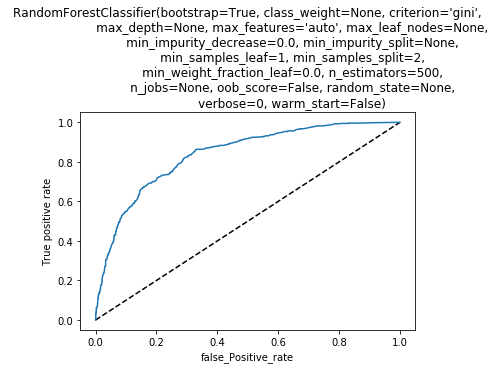

roc_auc_score= 0.7229615184577131


In [61]:
roc(rf)

In [62]:
cross_val(rf)

[0.79811469 0.7863315  0.78144654 0.79716981 0.79701023]
0.7920145540940353
0.006822390984001744


Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#getting best params
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid=GridSearchCV(gbc, parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [64]:
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
random(gbc)

0.8138095238095238 at 94


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=94)
model(gbc)

0.8138095238095238
[[1436  136]
 [ 255  273]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1572
           1       0.67      0.52      0.58       528

    accuracy                           0.81      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.80      0.81      0.81      2100



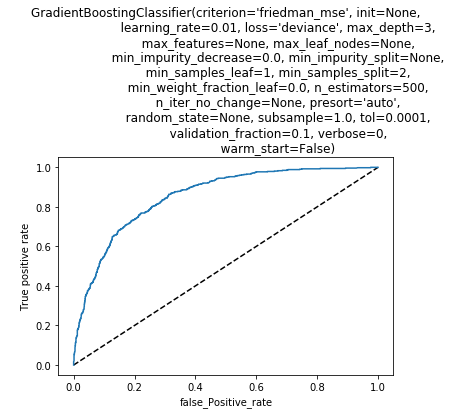

roc_auc_score= 0.7152657298172566


In [66]:
roc(gbc)

In [67]:
cross_val(gbc)

[0.81304006 0.8067557  0.78852201 0.80896226 0.80566483]
0.8045889731246525
0.008420759674071928


After solving for various algorithms above,we get the best score from Support Vector Classifier,so taking it as a final algorithm,lets solve it for one last time

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=84)
model(svm)

0.8214285714285714
[[1450  135]
 [ 240  275]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1585
           1       0.67      0.53      0.59       515

    accuracy                           0.82      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.81      0.82      0.81      2100



In [69]:
cross_val(svm)

[0.80754124 0.80361351 0.7908805  0.80896226 0.80173092]
0.8025456880767268
0.0063876228978519784


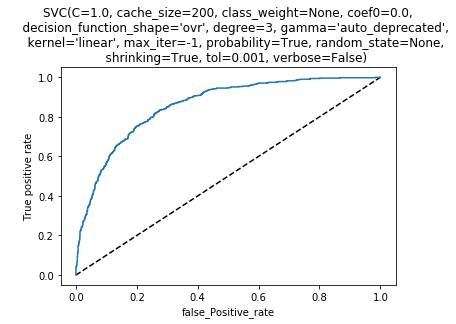

roc_auc_score= 0.7244035404734923


In [70]:
roc(svm)

In [71]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svm,'svm_customer_churn.pkl')

['svm_customer_churn.pkl']

## Conclusion

After importing the dataset,i checked first for the null values and the unique value counts from each columns.From these i get the idea which one is unnecessary and which is needed one for predicting the target.then i adjust the outliers and changed the datatypes of some of the features where needed.I plot various features with each other to get the data insights and checked the correlation among them.I used describe function to get the statistical summary and applied boxcox and zscore to manage the outliers detected from that.Then i sepearate the input and target variables.I checked for the skewed data on input variables and scaled them using standard scalar.After applying various machine learning algorithms,we get the best fit algorithm as Support Vector classifier.